# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import cv2
import tensorflow as tf
import keras

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# **Downlaod and Read Data**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
print(os.listdir(path))

['Meta', 'meta', 'Meta.csv', 'Train.csv', 'Test.csv', 'Test', 'test', 'Train', 'train']


In [ ]:
train_folder = path + '/Train'
num_of_categories = len(os.listdir(train_folder))
num_of_categories

43

In [ ]:
# Loading the training data
image_data = []
image_labels = []

for i in range(num_of_categories):
    path = train_folder + '/' + str(i)
    sign_images = os.listdir(path)
    print(len(sign_images))
    for img in sign_images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30, 30))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
'''for img in sign_images[:3]:
    image = cv2.imread(path + '/' + img)
    plt.imshow(image)
    plt.show()'''

210


/tmp/ipython-input-1520937009.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')


2220


/tmp/ipython-input-1520937009.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')


2250
1410
1980
1860
420
1440
1410
1470
2010
1320
2100
2160
780
630
420
1110
1200
210
360
330
390
510
270
1500
600
240
540
270
450
780
240
689
420
1200
390
210
2070
300
360
240
240
(39209, 30, 30, 3) (39209,)


"for img in sign_images[:3]:\n    image = cv2.imread(path + '/' + img)\n    plt.imshow(image)\n    plt.show()"

# **EDA**

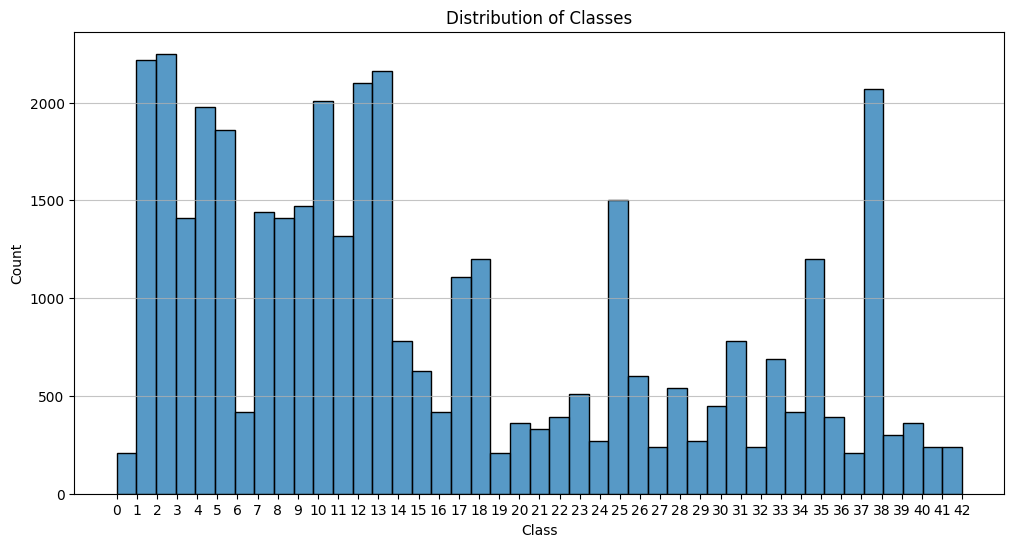

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(image_labels, bins=num_of_categories, kde=False)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(num_of_categories))
plt.grid(axis='y', alpha=0.75)
plt.show()

# **Preprocess Images**

In [ ]:
# Resizing and Normalizing the images
image_data = np.array([cv2.resize(img, (30, 30)) for img in image_data])
image_data = image_data/255.0
print(image_data.shape)

(39209, 30, 30, 3)


# **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31367, 30, 30, 3)
X_test shape: (7842, 30, 30, 3)
y_train shape: (31367,)
y_test shape: (7842,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_of_categories)
y_test = keras.utils.to_categorical(y_test, num_of_categories)

print(y_train.shape)
print(y_test.shape)

(31367, 43)
(7842, 43)


In [ ]:
# Data Augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

# Apply data augmentation to the training data
aug.fit(X_train)

# **CNN Model Training**

In [ ]:
model = Sequential()

model.add(Input(shape=(30,30,3)))
# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(num_of_categories, activation='softmax'))  # Output layer for classification

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(aug.flow(X_train, y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.2015 - loss: 2.8973 - val_accuracy: 0.6836 - val_loss: 1.0228
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.6214 - loss: 1.1567 - val_accuracy: 0.8910 - val_loss: 0.3890
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.7929 - loss: 0.6280 - val_accuracy: 0.9510 - val_loss: 0.2063
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.8732 - loss: 0.3949 - val_accuracy: 0.9703 - val_loss: 0.1076
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9002 - loss: 0.3101 - val_accuracy: 0.9768 - val_loss: 0.0853
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9244 - loss: 0.2386 - val_accuracy: 0.9856 - val_loss: 0.0533
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9376 - loss: 0.1944 - val_accuracy: 0.9848 - val_loss: 0.0568
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9486 - loss: 0.1663 - val_accurac

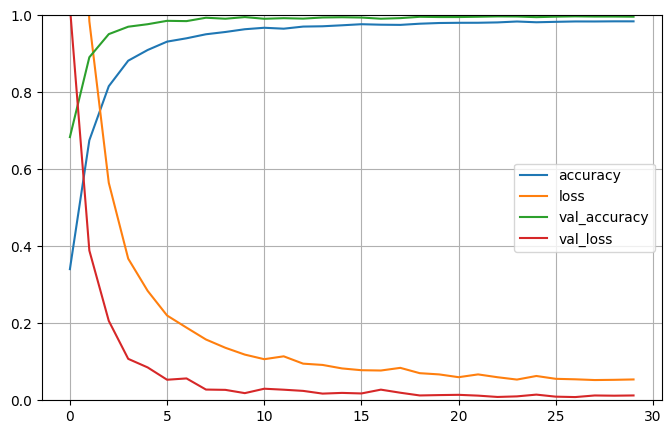

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9963019637847488


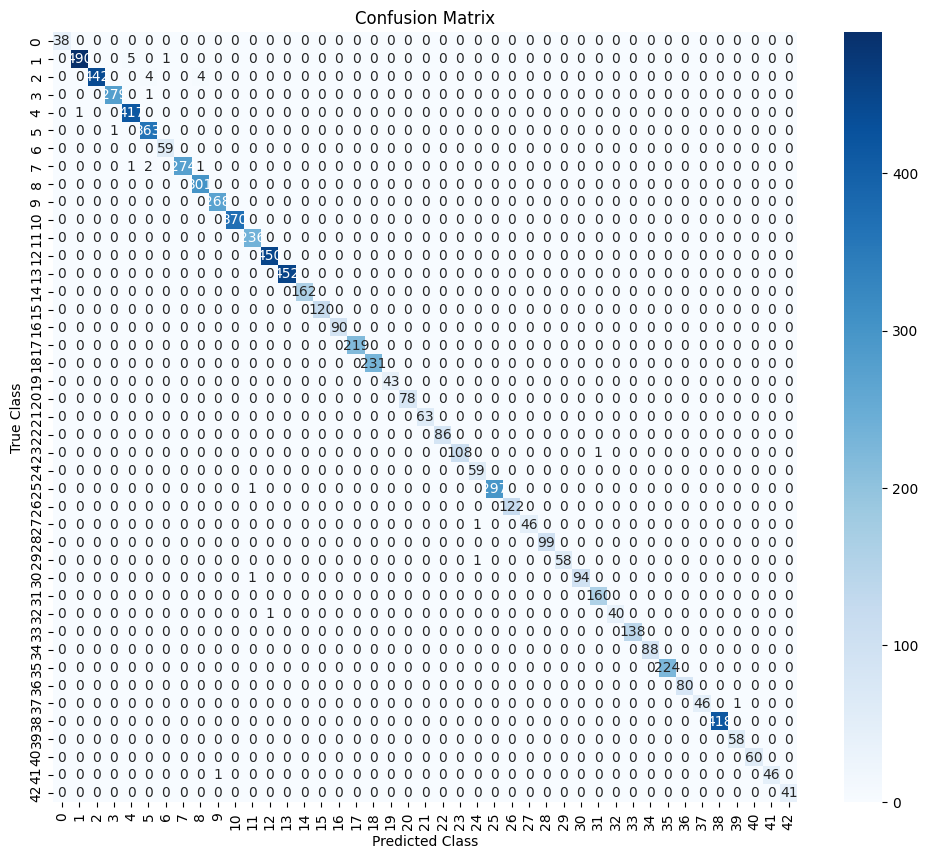

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predict the classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# **MobileNet Training**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout # Import Dense and Dropout
from tensorflow.keras.models import Model
import cv2
import numpy as np # Import numpy for array operations
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top classification layer
# Input size must be at least 32x32 for MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global average pooling layer and new dense/dropout layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)  # Add the Dense layer
x = Dropout(0.5)(x)  # Add the Dropout layer
predictions = Dense(num_of_categories, activation="softmax")(x) # Use num_of_categories for output

# Create the new model
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Resize the training and testing data to 32x32 for MobileNetV2
X_train_resized = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (32, 32)) for img in X_test])


# Train the model
history_mobilenet = model_mobilenet.fit(aug.flow(X_train_resized, y_train, batch_size=32),
                                         epochs=30,
                                         validation_data=(X_test_resized, y_test))

/tmp/ipython-input-1572804848.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.1742 - loss: 3.0560 - val_accuracy: 0.3031 - val_loss: 2.3944
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.2733 - loss: 2.5030 - val_accuracy: 0.3220 - val_loss: 2.2741
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.2874 - loss: 2.4118 - val_accuracy: 0.3365 - val_loss: 2.2058
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.3062 - loss: 2.3318 - val_accuracy: 0.3443 - val_loss: 2.1643
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.3125 - loss: 2.3193 - val_accuracy: 0.3544 - val_loss: 2.1226
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.3111 - loss: 2.2916 - val_accuracy: 0.3564 - val_loss: 2.1025
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.3190 - loss: 2.2754 - val_accuracy: 0.3597 - val_loss: 2.0819
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.3221 - loss: 2.2454 - val_accurac

# **Compare custom CNN vs. pre-trained model (e.g., MobileNet)**

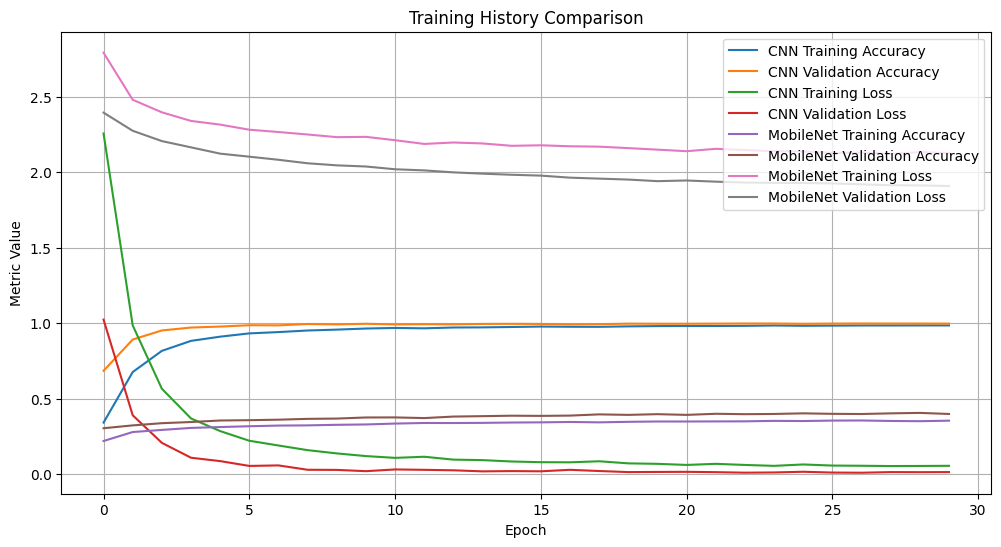

Final CNN Model Test Accuracy: 0.9963019490242004
Final MobileNet Model Test Accuracy: 0.3976026475429535


In [ ]:
# Plot training history for both models
plt.figure(figsize=(12, 6))

# Plot CNN history
plt.plot(model.history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(model.history.history['loss'], label='CNN Training Loss')
plt.plot(model.history.history['val_loss'], label='CNN Validation Loss')

# Plot MobileNet history
plt.plot(history_mobilenet.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.plot(history_mobilenet.history['loss'], label='MobileNet Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='MobileNet Validation Loss')


plt.title('Training History Comparison')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# Print final accuracies
cnn_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
mobilenet_accuracy = model_mobilenet.evaluate(X_test_resized, y_test, verbose=0)[1] # Use resized test data for MobileNet

print(f"Final CNN Model Test Accuracy: {cnn_accuracy}")
print(f"Final MobileNet Model Test Accuracy: {mobilenet_accuracy}")